### Workshop series, Koç University, Turkey, 11-12 April 2023

##  [Introduction to Computational Social Science methods with Python](https://socialcomquant.ku.edu.tr/intro-to-css-methods-with-python/)

# Workshop 2: Introduction to network analysis with Python - Part II

**Description**: Computational Social Science is often concerned with the traces of human behavior like those left by uses of social media, messaging services, or cell phones. Such digital behavioral data is genuinely relational and can, therefore, be studied using the formal techniques of network analysis. The basic units of networks called nodes can be actors (e.g., users), communicative symbols (e.g., hashtags), or even transactions (e.g., tweets). By focusing on the edges (relations) among nodes, network analysis is capable of creating insights that are not possible by merely doing statistics on the nodes and their attributes. In the workshop, we will give an introduction to how network data should be organized, how networks can be created in Python, and how they can be analyzed on three levels. On the micro level, we will introduce centrality analysis which results in numerical descriptions of nodes. On the meso level, we will introduce community detection, which results in sets of nodes that form groups or clusters. On the macro level, we will introduce measures that describe homophily, assortativity of, the network in its entirety. We will be using network data from the Copenhagen Networks Study, which describes four different types of social relations among students over time. The workshop will alternate between live-coding demonstrations and periods in which participants apply that knowledge in context, both using Jupyter Notebooks. The software we will be using is NetworkX, a standard Python library that is simple to understand, provides a breadth of options and has a large user community.

**Target group**: Undergraduate, master students, doctoral candidates, and experienced researchers who want to get introduced to the practice of Computational Social Science.

**Requirements**: Participants are expected to know the basics of Python and have at least some experience using it. For the workshops, participants should bring a running system on which they can execute Jupyter Notebooks. We will be using Python 3.9 and several standard libraries that are part of the Anaconda 2022.10 distribution or can be installed on top of that. A list of libraries and versions of these libraries that participants should import will be circulated before the workshops. We recommend that participants install Anaconda 2022.10. Feel free to also work in a cloud-like Google Colab. Consult [this link](https://github.com/gesiscss/css_methods_python/blob/main/a_introduction/1_computing_environment.ipynb) for more detailed instructions on how to set up your computing environment.

**Lecturers**: Dr. Haiko Lietz is a postdoctoral researcher in the Computational Social Science department at GESIS - Leibniz Institute for the Social Sciences. His research interests are in computational sociology, network science, and complexity science. Dr. N. Gizem Bacaksizlar Turbic is a postdoctoral researcher in the Computational Social Science departments at RWTH Aachen University and GESIS - Leibniz Institute for the Social Sciences. Her research areas include complex adaptive systems and social and political networks.

## Documentation of Networkx 2.8.4

https://networkx.org/documentation/networkx-2.8.4/reference/index.html

## Network analysis

### Centrality measures

In [89]:
import networkx as nx
nx.__version__
import pandas as pd
from operator import itemgetter


In [90]:
# we will focus on the directed network of sms data first
D_sms = nx.read_gml('./data/D_sms_week1_lcc.gml')
D_sms = nx.convert_node_labels_to_integers(D_sms, first_label=0, ordering='default', label_attribute=None)


#### Degree centrality
The __degree__ is the number of ties a node has. The __degree centrality__ for a node _v_ is the fraction of nodes it is connected to. It measures potential communication activity. 

In [91]:
degree_cent = nx.degree_centrality(D_sms)

In [92]:
# show the first five nodes of the degree centrality dictionary
list(degree_cent.items())[:5]

[(0, 0.0196078431372549),
 (1, 0.09803921568627451),
 (2, 0.058823529411764705),
 (3, 0.0196078431372549),
 (4, 0.0392156862745098)]

In [93]:
# get the top five nodes with higher degree centrality
dict(sorted(degree_cent.items(), key = itemgetter(1), reverse = True)[:5])

{48: 0.13725490196078433,
 1: 0.09803921568627451,
 24: 0.09803921568627451,
 10: 0.08823529411764705,
 16: 0.08823529411764705}

#### In-degree centrality
The __in-degree centrality__ for a node _v_ is the fraction of nodes its incoming edges are connected to.

In [94]:
in_degree_cent = nx.in_degree_centrality(D_sms)

In [95]:
# show the first five nodes of the in_degree centrality dictionary
list(in_degree_cent.items())[:5]

[(0, 0.00980392156862745),
 (1, 0.049019607843137254),
 (2, 0.0196078431372549),
 (3, 0.00980392156862745),
 (4, 0.0196078431372549)]

In [96]:
# get the top five nodes with higher in_degree centrality
dict(sorted(in_degree_cent.items(), key = itemgetter(1), reverse = True)[:5])

{48: 0.06862745098039216,
 1: 0.049019607843137254,
 24: 0.049019607843137254,
 89: 0.049019607843137254,
 16: 0.0392156862745098}

#### Out-degree centrality
The __out-degree centrality__ for a node _v_ is the fraction of nodes its outgoing edges are connected to.

In [97]:
out_degree_cent = nx.out_degree_centrality(D_sms)

In [98]:
# show the first five nodes of the out_degree centrality dictionary
list(out_degree_cent.items())[:5]

[(0, 0.00980392156862745),
 (1, 0.049019607843137254),
 (2, 0.0392156862745098),
 (3, 0.00980392156862745),
 (4, 0.0196078431372549)]

In [99]:
# get the top five nodes with higher out_degree centrality
dict(sorted(out_degree_cent.items(), key = itemgetter(1), reverse = True)[:5])

{10: 0.06862745098039216,
 48: 0.06862745098039216,
 1: 0.049019607843137254,
 16: 0.049019607843137254,
 24: 0.049019607843137254}

#### PageRank 
__PageRank__ counts the number and quality of links to a node to determine a rough estimate of how important the node is. The underlying assumption is that more important nodes are likely to receive more edges from other nodes.

Note: Undirected graphs will be converted to a directed graph with two directed edges for each undirected edge.

More details here https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

In [100]:
pagerank_cent = nx.pagerank(D_sms, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)


In [101]:
# show the first five nodes of the pagerank centrality dictionary
list(pagerank_cent.items())[:5]

[(0, 0.00845033579527927),
 (1, 0.03120404417124258),
 (2, 0.006209332046026926),
 (3, 0.007089109101817634),
 (4, 0.01360904293431955)]

In [102]:
# get the top five nodes with higher pagerank centrality
dict(sorted(pagerank_cent.items(), key = itemgetter(1), reverse = True)[:5])

{16: 0.04604556872141617,
 48: 0.04228585153155774,
 1: 0.03120404417124258,
 56: 0.025740561354495414,
 82: 0.024451897906786473}

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [104]:
D_sms.degree(weight='weight')[4]

28

In [105]:
[node for node in nx.neighbors(D_sms, n=4)]

[67, 87]

##### Correlation of centrality measures

In [106]:
nodelist_cent = pd.DataFrame()
nodelist_cent['degree'] = degree_cent.values()
nodelist_cent['in_degree'] = in_degree_cent.values()
nodelist_cent['out_degree'] = out_degree_cent.values()
nodelist_cent['pagerank'] = pagerank_cent.values()

In [107]:
nodelist_cent.corr()

,degree,in_degree,out_degree,pagerank
degree,1.000000,0.936087,0.951642,0.670748
in_degree,0.936087,1.000000,0.782753,0.694369
out_degree,0.951642,0.782753,1.000000,0.580243
pagerank,0.670748,0.694369,0.580243,1.000000


In [108]:
data = (1 - nodelist_cent.corr()).values

In [109]:
from sklearn.manifold import MDS

In [110]:
mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed')
pos = mds.fit(data).embedding_

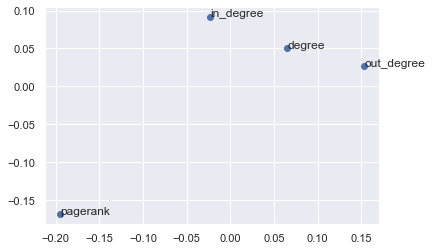

In [111]:
plt.scatter(pos[:, 0], pos[:, 1])
for i in range(0, len(nodelist_cent.columns)):
    plt.text(pos[i, 0], pos[i, 1], nodelist_cent.columns[i])

### Exercise 2: Add closeness and betweenness centralities, then update the correlation analysis

__Closeness centrality__ of a node _u_ is the reciprocal of the average shortest path distance to _u_ over all _n-1_ reachable nodes. 

`closeness_centrality(G, u=None, distance=None)` where `u` is node for which centrality should be calculated and `distance` edge attribute name that should be used to calculate distance in shortest pathes.

__Betweenness centrality__ of a node _v_ is the sum of the fraction of all-pairs shortest paths that pass through _v_.

`betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)` where `k` size of random samples to estimate betweenness, `weight` is the name of the attribute that should be used as distance metric and `seed` is random number generation state. 

More detail here https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html


In [112]:
closeness_cent = nx.closeness_centrality(D_sms, distance = None)

In [113]:
betweenness_cent = nx.betweenness_centrality(D_sms, normalized=True)

In [114]:
nodelist_cent['closeness'] = closeness_cent.values()
nodelist_cent['betweenness'] = betweenness_cent.values()

In [115]:
nodelist_cent.corr()

,degree,in_degree,out_degree,pagerank,closeness,betweenness
degree,1.000000,0.936087,0.951642,0.670748,0.433721,0.707088
in_degree,0.936087,1.000000,0.782753,0.694369,0.501699,0.717419
out_degree,0.951642,0.782753,1.000000,0.580243,0.329171,0.624405
pagerank,0.670748,0.694369,0.580243,1.000000,0.290625,0.517066
closeness,0.433721,0.501699,0.329171,0.290625,1.000000,0.531882
betweenness,0.707088,0.717419,0.624405,0.517066,0.531882,1.000000


In [116]:
new_data = (1 - nodelist_cent.corr()).values

In [117]:
mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed')
pos = mds.fit(new_data).embedding_

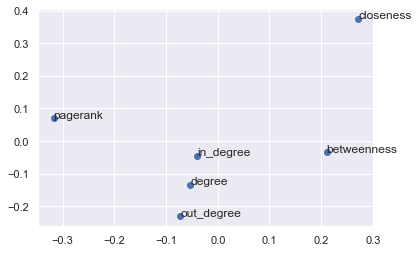

In [118]:
plt.scatter(pos[:, 0], pos[:, 1])
for i in range(0, len(nodelist_cent.columns)):
    plt.text(pos[i, 0], pos[i, 1], nodelist_cent.columns[i])

### Community detection

For community detection, we move to networks from our bluetooth exercises.

In [121]:
G_bt_snapshot1 = nx.read_gml('./data/G_bt_snapshot1.gml')


In [122]:
from networkx.algorithms.community import louvain_communities

In [123]:
louvain_snapshot1 = louvain_communities(G=G_bt_snapshot1, weight='weight', seed=42)

In [124]:
def get_partition(communities):
    return dict(sorted({node: community for community in range(len(communities)) for node in list(communities[community])}.items()))

In [125]:
get_partition(louvain_snapshot1).values()

dict_values([4, 2, 5, 2, 14, 3, 0, 10, 0, 5, 17, 12, 4, 9, 22, 7, 15, 12, 19, 22, 4, 24, 5, 16, 5, 5, 6, 2, 9, 3, 7, 4, 5, 12, 12, 7, 23, 24, 4, 5, 4, 7, 2, 7, 13, 24, 29, 6, 5, 9, 11, 25, 5, 16, 12, 9, 12, 21, 22, 7, 4, 11, 11, 5, 5, 9, 5, 24, 10, 5, 10, 22, 15, 15, 12, 4, 4, 5, 26, 3, 15, 5, 22, 12, 9, 12, 4, 5, 12, 7, 9, 8, 2, 2, 11, 22, 5, 5, 2, 9, 4, 2, 24, 9, 5, 9, 10, 11, 11, 12, 2, 22, 9, 5, 12, 11, 12, 4, 20, 11, 13, 4, 18, 24, 24, 11, 22, 1, 28, 22, 2, 26, 2, 12, 11, 7, 14, 5, 2, 11, 22, 15, 4, 11, 5, 22, 11, 12, 2, 15, 16, 17, 7, 11, 4, 4, 4, 26, 18, 7, 2, 19, 5, 11, 11, 5, 15, 16, 20, 21, 4, 23, 9, 4, 12, 22, 7, 23, 2, 12, 24, 5, 15, 25, 5, 7, 5, 24, 7, 5, 24, 27, 7, 14, 7, 26, 7, 12, 9, 9, 5, 12, 22, 27, 4, 9, 12, 12, 28, 1, 2, 8, 29, 5, 12, 12, 9, 9, 12])

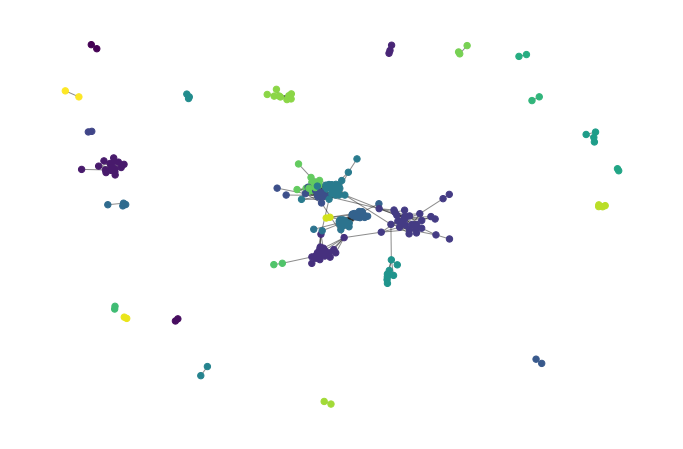

In [126]:
plt.figure(figsize=(12,8))

pos = nx.spring_layout(G_bt_snapshot1)

cmap = plt.get_cmap('viridis', max(get_partition(louvain_snapshot1).values()) + 1)

nx.draw_networkx_nodes(G_bt_snapshot1, pos, get_partition(louvain_snapshot1).keys(), node_size=40, cmap=cmap, node_color=list(get_partition(louvain_snapshot1).values()))
nx.draw_networkx_edges(G_bt_snapshot1, pos, alpha=0.5)
plt.axis('off')
plt.savefig('./results/G_bt_snapshot1_darker_colors.png')
plt.savefig('./results/G_bt_snapshot1_darker_colors.pdf')
plt.show()


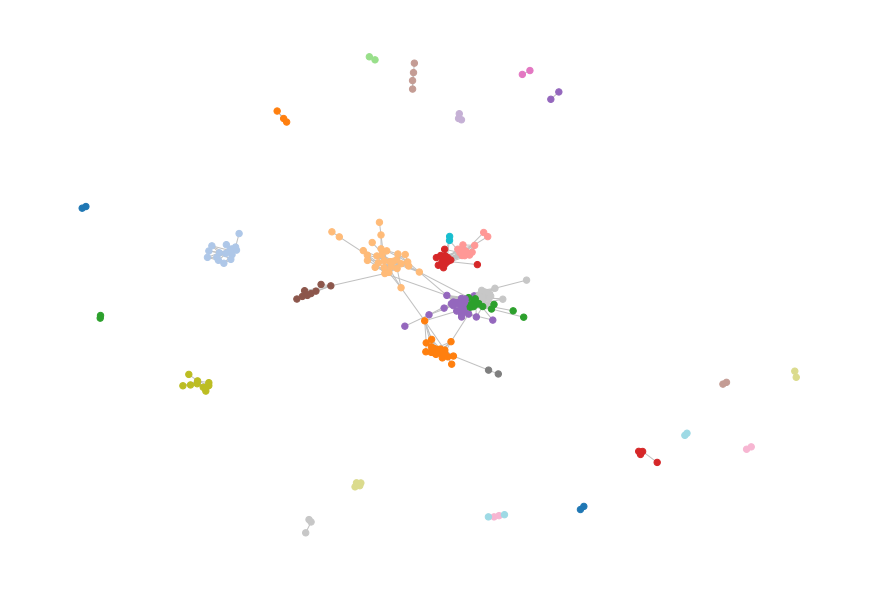

In [127]:
community_id = [get_partition(louvain_snapshot1)[node] for node in G_bt_snapshot1.nodes()]
pos = nx.spring_layout(G_bt_snapshot1)

fig = plt.figure(figsize=(12,8))
nx.draw(G_bt_snapshot1, pos, edge_color = ['silver'] * len(G_bt_snapshot1.edges()), 
        cmap = plt.cm.tab20, node_color = community_id, node_size = 40)

plt.savefig('./results/G_bt_snapshot1_lighter_colors.png')
plt.savefig('./results/G_bt_snapshot1_lighter_colors.pdf')

### Exercise 3: Try Louvain method on the snapshot 4's graph

Will add when we have snapshot 4 ready with attributes or pickle version..

In [128]:
G_bt_snapshot4 = nx.read_gml('./data/G_bt_snapshot4.gml')
                        

In [129]:
louvain_snapshot4 = louvain_communities(G=G_bt_snapshot4, weight='weight', seed=42)

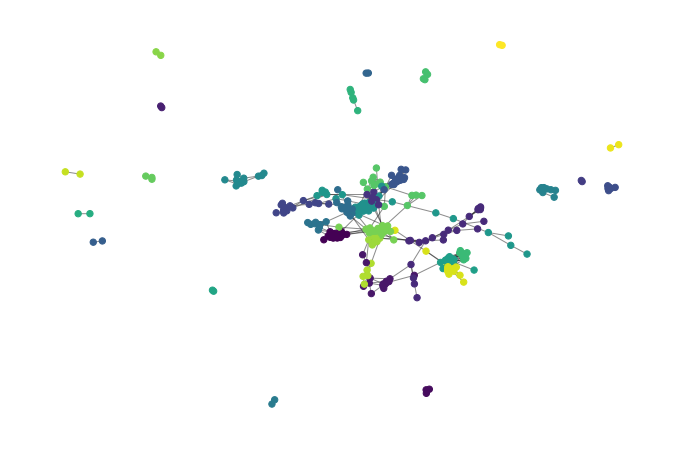

In [130]:
plt.figure(figsize=(12,8))

pos = nx.spring_layout(G_bt_snapshot4)

cmap = plt.get_cmap('viridis', max(get_partition(louvain_snapshot4).values()) + 1)

nx.draw_networkx_nodes(G_bt_snapshot4, pos, get_partition(louvain_snapshot4).keys(), node_size=40, cmap=cmap, node_color=list(get_partition(louvain_snapshot4).values()))
nx.draw_networkx_edges(G_bt_snapshot4, pos, alpha=0.5)
plt.axis('off')
plt.savefig('./results/G_bt_snapshot4_darker_colors.png')
plt.savefig('./results/G_bt_snapshot4_darker_colors.pdf')
plt.show()



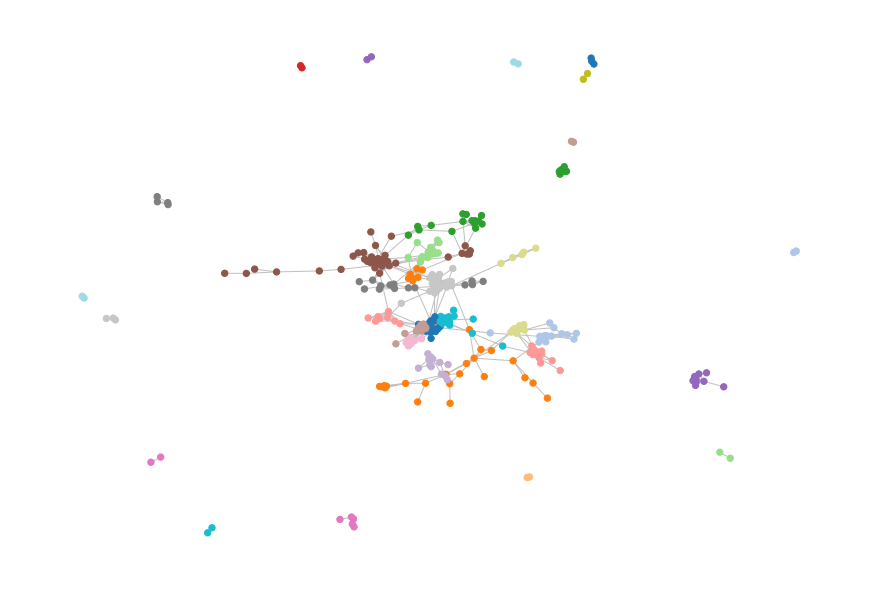

In [131]:
community_id_snapshot4 = [get_partition(louvain_snapshot4)[node] for node in G_bt_snapshot4.nodes()]
pos = nx.spring_layout(G_bt_snapshot4)

fig = plt.figure(figsize=(12,8))
nx.draw(G_bt_snapshot4, pos, edge_color = ['silver'] * len(G_bt_snapshot4.edges()), 
        cmap = plt.cm.tab20, node_color = community_id_snapshot4, node_size = 40)

plt.savefig('./results/G_bt_snapshot4_lighter_colors.png')
plt.savefig('./results/G_bt_snapshot4_lighter_colors.pdf')

### Homophily

Assortativity helps analysing pattern of connections in networks. To analyze homophily (if people tend to connect to similar people), we can use attribute assortativity coefficient and attribute mixing matrix.

The sex categories are 0: male; 1: female; 2: unknown.

In [132]:
nx.attribute_assortativity_coefficient(G=G_bt_snapshot1, attribute='sex')

0.1427991611986741

In [133]:
nx.attribute_mixing_matrix(G=G_bt_snapshot1, attribute='sex', normalized=False)

array([[  0.,  13.,   8.],
       [ 13., 566., 243.],
       [  8., 243., 202.]])

In [134]:
from collections import Counter
import numpy as np

We will transform the cells in the attribute_mixing_matrix into densities and then divide by the overall network density to see where attribute mixing is stronger than expected. Note that categories (i.e, male, female, and unknown) have different sizes.

In [135]:
def attribute_density_matrix(G, attribute):
    l = [data[attribute] for v, data in G.nodes(data=True)]
    counts = list(Counter(l).values())
    a = np.empty(shape=(len(counts), len(counts)))
    for i in range(len(counts)):
        for j in range(len(counts)):
            if i == j:
                a[i, j] = counts[i] * (counts[j] - 1)
            else:
                a[i, j] = counts[i] * counts[j]
    return nx.attribute_mixing_matrix(G=G, attribute=attribute, normalized=False) / a

In [136]:
p_bt = nx.density(G=G_bt_snapshot1)

In [137]:
p_bt_sex = attribute_density_matrix(G=G_bt_snapshot1, attribute='sex').round(4)
p_bt_sex

array([[0.0000e+00, 1.4000e-03, 8.9000e-03],
       [1.4000e-03, 1.4040e-01, 6.3280e-01],
       [8.9000e-03, 6.3280e-01, 6.7333e+00]])

In [138]:
(p_bt_sex / p_bt).round(2)

array([[0.0000e+00, 5.0000e-02, 3.3000e-01],
       [5.0000e-02, 5.1700e+00, 2.3310e+01],
       [3.3000e-01, 2.3310e+01, 2.4804e+02]])